In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVR
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("./Video_Games_Sales_as_at_22_Dec_2016.csv")
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2021 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,14.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,1.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,11.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,14.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,18.000000


In [6]:
print(data.shape)

(16448, 17)


### check for outliers between dependent and independent variables

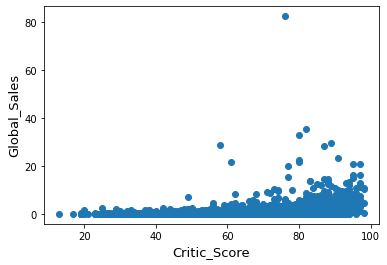

In [7]:
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

 Remove outlier

In [8]:
data = data.drop(data[(data['Critic_Score']>60) & (data['Global']>60)].index)

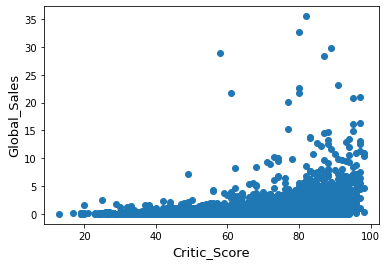

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()


 mu = 0.83 and sigma = 1.90



Text(0.5, 1.0, 'Global_Sales distribution')

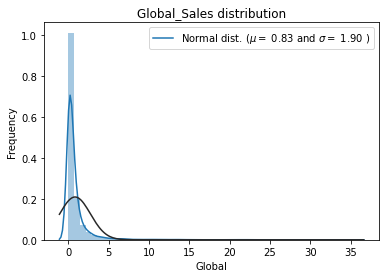

In [42]:
from scipy import stats
from scipy.stats import norm, skew 

sns.distplot(data['Global'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Global'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

<AxesSubplot:title={'center':'Pearson Correlation of Video Game Numerical Features'}>

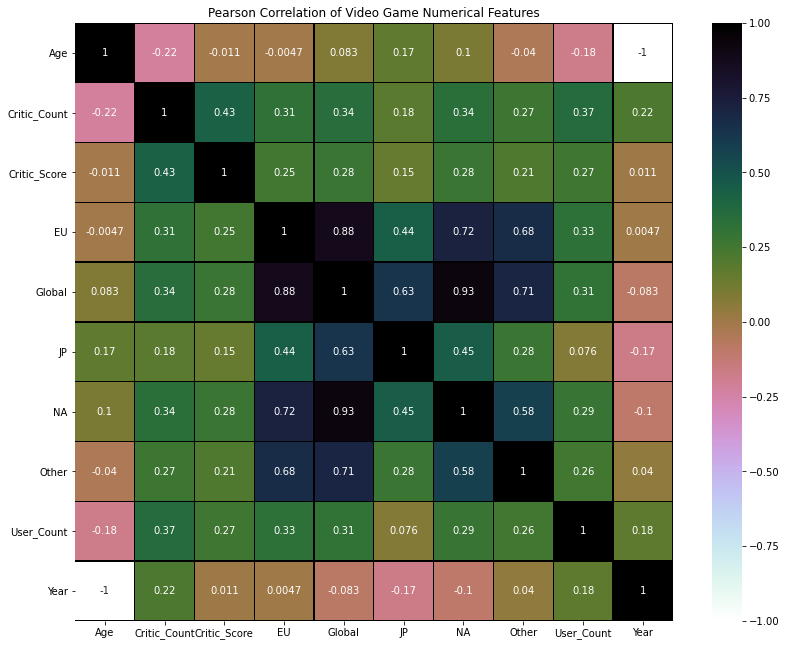

In [11]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Pearson Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)

In terms of autocorrelation the prospective independent variables aren't too highly correlated with each other in the correlation heat map. Only sales numbers are highly correlated with each other. Therefore we can look at intercepts of regression models without too much worries if we wish to do so later on. Higher correlations between sales figures may speak to the global nature of the video game industry: a success in one continent usually means a success in another continent as well. This lends greater confidence to using just Global_Sales as the dependent variable.

In [12]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio
User_Count,54.630024
Critic_Count,51.468353
Critic_Score,51.468353
Rating,40.609230
User_Score,40.177540
Developer,39.770171
Publisher,0.194564


In [13]:
print(pd.value_counts(data["Platform"]))

PS2     2127
DS      2122
PS3     1306
Wii     1285
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      431
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


In [14]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

In [15]:
print(pd.value_counts(data["Platform"]))

PS3     1306
Wii     1285
X360    1232
PC       957
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64


In [16]:
#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(5567, 17)


,Missing Ratio
Critic_Count,37.578588
Critic_Score,37.578588
User_Count,34.488953
Rating,23.765044
User_Score,22.471708
Developer,21.807077
Publisher,0.089815


In [17]:
data = data.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3475, 17)


,Missing Ratio
User_Count,4.863309
Rating,1.985612
User_Score,0.460432
Developer,0.086331
Publisher,0.028777


This looks better already. We've reached the point where we've dealt with N/A values for the most important variable and we still have enough data to work with. We still have to handle N/A values for the rest of the variables however, but this isn't as glaring of an issue as the missing ratios are relatively small, the highest being roughly 5 % for User_Count.

Let's deal with the rest of the N/A values next.

### Fill Publisher, Developer, Rating with the mode
### Fill User_Score, User_count , Year with median

In [18]:
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

In [19]:
#There's "tbd" values in the mix here which we need to handle first
data['User_Score'] = data['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

data['Year'] = data['Year'].fillna(data['Year'].median())
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())

In [20]:
#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


### Change independent  variables to dummy variables ( one-hot )
    - platform
    - Genre
    - Publisher
    - Developer
    - Rating

In [21]:
data['Platform'].unique()

array(['Wii', 'X360', 'PS3', 'PS4', 'PC', 'WiiU', 'XOne'], dtype=object)

In [22]:
data['Genre'].unique()

array(['Racing', 'Sports', 'Misc', 'Platform', 'Action', 'Shooter',
       'Fighting', 'Role-Playing', 'Simulation', 'Adventure', 'Strategy',
       'Puzzle'], dtype=object)

In [23]:
data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Activision', 'Sony Computer Entertainment', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'LucasArts',
       'Warner Bros. Interactive Entertainment', 'Square Enix', 'Capcom',
       'Eidos Interactive', 'Vivendi Games', 'Namco Bandai Games',
       'MTV Games', 'THQ', 'Disney Interactive Studios', 'Sega',
       '505 Games', 'Midway Games', 'Red Orb', 'Deep Silver', 'NCSoft',
       'Valve Software', 'Valve', 'Hello Games', 'Atari', 'Codemasters',
       'Zoo Games', 'RTL', 'D3Publisher', 'City Interactive', 'Russel',
       'Slightly Mad Studios', 'Tomy Corporation', 'Tecmo Koei',
       'Focus Home Interactive', 'Square Enix ', 'Ubisoft Annecy',
       'Rising Star Games', 'Koch Media', 'Hudson Soft', 'Touchstone',
       'Atlus', 'Spike', 'Sony Computer Entertainment America',
       'SouthPeak Games', 'Unknow

In [24]:
data['Developer'].unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North',
       'Infinity Ward, Sledgehammer Games', 'Treyarch', 'Infinity Ward',
       'Game Arts', 'Bungie Software, Bungie', 'Polyphony Digital',
       'Ubisoft', 'Bungie', '343 Industries', 'Bethesda Game Studios',
       'EA Sports', 'Nd Cube', 'Hudson', 'Electronic Arts',
       'The Sims Studio', 'Sledgehammer Games', 'EA Sports, EA Vancouver',
       'Nintendo EAD Tokyo', 'EA DICE', 'Ubisoft Paris', 'Epic Games',
       'Naughty Dog', 'Rockstar San Diego', 'EA Canada', 'Retro Studios',
       'Blizzard Entertainment', 'Rare Ltd.', 'Kojima Productions',
       'SCE/WWS, Media Molecule', "Traveller's Tales", 'Ubisoft Montreal',
       'Turn 10', 'Rocksteady Studios', 'Square Enix', 'Lionhead Studios',
       'Capcom', 'Naughty Dog, SCE/WWS', 'SCE Santa Monica',
       'Bluepoint Games', 'Vicarious Visions', 'Neversoft Entertainment',
       'Bethesda Softworks', 'Ubisoft Paris, Ubisoft Montpellier',
       'Insomniac Games', 'V

In [25]:
data['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'RP'], dtype=object)

#### Publisher and Developer have so many unique values. At this point it seems best to drop these features entirely

### Remaining independent  variables to dummy variables ( one-hot )
    - platform
    - Genre
    - Rating

In [26]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head #Check to verify that dummies are ok

(3475, 17)
(3475, 38)


<bound method NDFrame.head of                                     Name  Year                     Publisher  \
2                         Mario Kart Wii  2008                      Nintendo   
3                      Wii Sports Resort  2009                      Nintendo   
7                               Wii Play  2006                      Nintendo   
8              New Super Mario Bros. Wii  2009                      Nintendo   
13                               Wii Fit  2007                      Nintendo   
...                                  ...   ...                           ...   
16664                   Prison Architect  2016         Introversion Software   
16696  Metal Gear Solid V: Ground Zeroes  2014  Konami Digital Entertainment   
16700                             Breach  2011                     Destineer   
16706            STORM: Frontline Nation  2011                       Unknown   
16709                            15 Days  2009             DTP Entertainment   

         

Let's drop the features we wish to discard for our models. These include:

* Name
* Publisher
* Developer
* NA
* EU
* JP
* Other

In [27]:
data = data.drop(['Name','Publisher','Developer','NA', 'EU', 'JP', 'Other'], axis=1)

### Split into training and test data

In [28]:
X = data[['Year', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = data[['Global']]

In [29]:
print(X.shape)
print(Y.shape)

(3475, 29)
(3475, 1)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2606, 29)
Y_train shape: (2606, 1)
X_test shape: (869, 29)
Y_test shape: (869, 1)


When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid

In [31]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)


 mu = 0.43 and sigma = 0.48



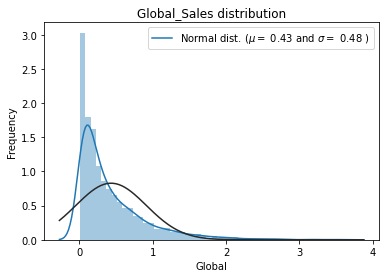

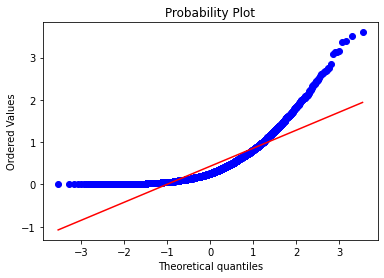

In [32]:
#Check the new distribution 
Y_log_transformed = np.log1p(data['Global']) #For comparison to earlier, here's the whole Y transformed
sns.distplot(Y_log_transformed , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Y_log_transformed, plot=plt)
plt.show()


In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)


Now we are really close to the fun part. First however, we need to prepare our grids for grid search. For this, we need to decide, which models we will use. So let's try:

* Linear Regression
* Lasso
* Ridge Regression
* Support Vector Regressor
* Random Forest
* Gradient Boosting Regressor

In [34]:
#No grid to define for vanilla linear regression
param_grid_lr = [
    {}
]

#Parameter grid for lasso
param_grid_lasso = [
    {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000000, 100000, 10000, 1000]}
]

#Parameter grid for Ridge Regression
param_grid_rr = [
    {'alpha': [100, 10, 1, 0.1, 0.01, 0.001]}
]

#Parameter grid for Support Vector Regressor
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

#Parameter grid for Random Forest
param_grid_rf = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}
]

#Parameter grid for Gradient Boosting Regressor
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

### Use RMSE for scoring the models

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lr_score)))

Best parameters: {}
Best cross-validation score: 0.42
Test set score: 0.43


In [36]:
from sklearn.linear_model import Lasso

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
lasso_best_cross_val_score = (np.sqrt(-grid_search_lasso.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(lasso_best_cross_val_score)))
lasso_score = np.sqrt(-grid_search_lasso.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(lasso_score)))


Best parameters: {'alpha': 0.001, 'max_iter': 1000000}
Best cross-validation score: 0.42
Test set score: 0.43


In [37]:
from sklearn.linear_model import Ridge

grid_search_rr = GridSearchCV(Ridge(), param_grid_rr, cv=5, scoring='neg_mean_squared_error')
grid_search_rr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rr.best_params_))
rr_best_cross_val_score = (np.sqrt(-grid_search_rr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rr_best_cross_val_score)))
rr_score = np.sqrt(-grid_search_rr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rr_score)))

Best parameters: {'alpha': 10}
Best cross-validation score: 0.42
Test set score: 0.43


In [38]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_svr.best_params_))
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(svr_score)))

Best parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Best cross-validation score: 0.50
Test set score: 0.51


In [39]:
from sklearn.ensemble import RandomForestRegressor

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_rf.best_params_))
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(rf_score)))

Best parameters: {'max_depth': 9, 'max_features': 12, 'n_estimators': 70}
Best cross-validation score: 0.35
Test set score: 0.35


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 250}
Best cross-validation score: 0.33
Test set score: 0.32
